In [1]:
cd ../..

/Users/ericpei/Documents/GalvClas/fantasy-score-predictor


In [2]:
from scripts import make_df

In [3]:
from scripts import random_forest

/Users/ericpei/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
#make_df.create_csvs('alldata')

In [5]:
df = make_df.create_df()

In [6]:
df = make_df.clean_df(df)

scripts/make_df.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['MP'] = df['MP'].map(lambda x: '0:00' if ":" not in str(x) else str(x))


In [7]:
df = make_df.drop_zerominutes(df)

In [8]:
df = make_df.add_features(df)

In [9]:
#look at this later
Player_Averages = make_df.make_averages(df)

In [10]:
date_matrix = make_df.get_date_matrix(df)

In [11]:
make_df.addcolumns(make_df.make_lists(date_matrix), df)

In [12]:
tp_matrix = df[['Player Name', '3P']].values
fg_matrix = df[['Player Name', 'FG']].values
ft_matrix = df[['Player Name', 'FT']].values
reb_matrix = df[['Player Name', 'TRB']].values
ast_matrix = df[['Player Name', 'AST']].values
blk_matrix = df[['Player Name', 'BLK']].values
stl_matrix = df[['Player Name', 'STL']].values
tov_matrix = df[['Player Name', 'TOV']].values
usg_matrix = df[['Player Name', 'USG%']].values
ftr_matrix = df[['Player Name', 'FTr']].values
pm_matrix = df[['Player Name', '+/-']].values
ts_matrix = df[['Player Name', 'TS%']].values
pf_matrix = df[['Player Name', 'PF']].values
ortg_matrix = df[['Player Name', 'ORtg']].values
drtg_matrix = df[['Player Name', 'DRtg']].values

In [13]:
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=tp_matrix, column='3P'), df, name='TP')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=fg_matrix, column='FG'), df, name='FG')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=ft_matrix, column='FT'), df, name='FT')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=reb_matrix, column='TRB'), df, name='TRB')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=ast_matrix, column='AST'), df, name='AST')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=blk_matrix, column='BLK'), df, name='BLK')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=stl_matrix, column='STL'), df, name='STL')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=tov_matrix, column='TOV'), df, name='TOV')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=usg_matrix, column='USG%'), df, name ='USGP')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=ftr_matrix, column='FTr'), df, name ='FTr')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=pm_matrix, column='+/-'), df, name ='PM')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=ts_matrix, column='TS%'), df, name ='TSP')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=pf_matrix, column='PF'), df, name ='PF')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=ortg_matrix, column='ORtg'), df, name ='ORtg')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=drtg_matrix, column='DRtg'), df, name ='DRtg')

In [14]:
from scripts import elevation_flight

In [15]:
Elevation_Lookup = elevation_flight.read_to_dict()

In [16]:
elevation_flight.lookup_and_add(Elevation_Lookup, df)

# Exploration

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
from sklearn.ensemble import RandomForestRegressor

### Make a testing Set

In [19]:
forest_df, y_df = random_forest.date_with_forest(df, 140, remove_date=True)

In [20]:
test_df, testy_df = random_forest.date_with_forest(df, remove_date=False)

In [21]:
import datetime

In [22]:
today = datetime.date.today()
stop_average_date = today - datetime.timedelta(140)

In [23]:
test_df = test_df[test_df['Date'] > stop_average_date]
testy_df = testy_df[testy_df['Date'] > stop_average_date]

In [24]:
test_df = test_df.ix[:,test_df.columns != 'Date']
testy_df = testy_df.ix[:, testy_df.columns != 'Date']

In [25]:
#forest_df, y_df = random_forest.prepare_for_forest(df)

In [26]:
TestSubject = 'Stephen Curry'

In [27]:
Stephcurry, Stephcurryafter_X, Stephcurryafter_y = random_forest.individual_forest_df(test_df, testy_df, TestSubject)

In [28]:
Stephcurry, Stephcurry_X, Stephcurry_y = random_forest.individual_forest_df(forest_df, y_df, TestSubject)

In [29]:
X_train, X_test, y_train, y_test = random_forest.crossval_player(Stephcurry, forest_df[forest_df["Player Name"] != TestSubject], y_df[y_df['Player Name'] != TestSubject], cat=2)
X_trainA, X_testA, y_trainA, y_testA = random_forest.crossval_player(Stephcurry, test_df, testy_df, cat=2)
X_trainS, X_testS, y_trainS, y_testS = random_forest.crossval_player(Stephcurry, Stephcurry_X, Stephcurry_y, cat=2)
X_trainSA, X_testSA, y_trainSA, y_testSA = random_forest.crossval_player(Stephcurry, Stephcurryafter_X, Stephcurryafter_y, cat = 2)

scripts/random_forest.py:72: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  X_train, X_test, y_train, y_test = train_test_split(player_x[list(player_x.columns-['Player Name'])], player_y.iloc[:,cat], test_size = 0.25, random_state = 30)


###### X Train is the df without Curry
###### X Train2 is the df with just Curry
###### S = Curry A is after cutoff

In [30]:
X_trainfull = pd.concat([X_train, X_trainS, X_trainS, X_trainSA])
y_trainfull = pd.concat([y_train, y_trainS, y_trainS, y_trainSA])

Now X Train2 is just Curry, while X Train is everyone including Curry

In [31]:
everyFGmean = pd.concat([y_train, y_trainS]).mean()
stephFGmean = y_trainS.mean()

In [32]:
len(X_test), len(X_testSA)

(63197, 16)

In [33]:
benchmark = np.full(len(X_testA)+len(X_testSA), everyFGmean)
s_benchmark = np.full(len(X_testSA), stephFGmean)

In [34]:
rf = RandomForestRegressor()
rf2 = RandomForestRegressor()

In [35]:
rf.fit(X_trainfull, y_trainfull)
rf2.fit(X_trainS, y_trainS)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [36]:
y_predict = rf.predict(X_testA)
y_predict = np.append(y_predict, rf.predict(X_testSA))# + rf.predict(X_test2)
y_predictS = rf2.predict(X_testSA)

### MSE of Everyone model on everyone. MSE of my StephCurry Model on himself

In [37]:
mean_squared_error(np.append(y_testA,y_testSA), y_predict), mean_squared_error(y_testSA, y_predictS)

(5.7714174454828662, 10.344374999999999)

## How do we do against the benchmark?

In [38]:
mean_squared_error(np.append(y_testA,y_testSA), benchmark), mean_squared_error(y_testSA, s_benchmark)

(9.06514475111236, 15.289091610523542)

#### We have a lower MSE than average on all players
#### Lower MSE on Curry compared to his own average

In [39]:
y_predict3 = rf.predict(X_testSA)
mean_squared_error(y_testSA, y_predict3)

11.550625

# Averages Per Min

In [40]:
from scripts import pca_ready

In [41]:
PA = make_df.make_averages(df, cutoff=14)

In [42]:
PA48 = make_df.make_averages_per48(PA)

In [43]:
mat, comp = pca_ready.run_pca(PA48.iloc[:,:8])

In [44]:
from sklearn.cluster import KMeans

In [45]:
km = KMeans(n_clusters=5, random_state = 30)
#km = KMeans(n_clusters=10, random_state = 30)


In [46]:
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

([array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,   20.,  232.,  326.,  224.,  222.,  130.,   30.,    4.,
            1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            1.,    0.,    1.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    7.,    4.,
            6.,   33.,  136.,  335.,  329.,  210.,   76.,   32.,   15.,
            5.,    1.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,
            0.,    0.,    0.]),
  array([   1.,    0.,    1.,    0.,    0.,    0.,    0.,    1.,   10.,
           16.,   50.,  112.,  246.,  371.,  275.,   87.,   16.,    2.,
            0.,    0.,    1.,    1.,    1.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.])],
 array([ -8.60936037,  -7.96244518,  -7.31553   ,  -6.66861481,
         -6.02169962,  -5.37478443,  -4.72786925,  -4.08095406,
         -3.43403887,  -2.78712368,  -2.1402085 ,  -1.49329331,
         -0.84637812,  -0.19946294,   0.44745225,   1.09436744,

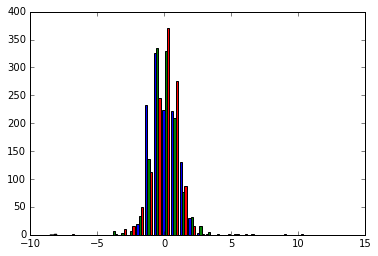

In [48]:
plt.hist(mat, bins=30)

In [49]:
km.fit(mat)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [50]:
dict_pca2 = pca_ready.make_cluster_dictionary2(km, PA48)

In [51]:
dict_pca2

defaultdict(list,
            {0: ['Aaron Harrison',
              'Aaron McKie',
              'Adam Morrison',
              'Adonis Thomas',
              'Alan Anderson',
              'Alex Acker',
              'Alex Kirk',
              'Alex Scales',
              'Allan Ray',
              'Allen Crabbe',
              'Alonzo Gee',
              'Andre Dawkins',
              'Andre Emmett',
              'Andre Owens',
              'Andre Roberson',
              'Andreas Glyniadakis',
              'Andrew Goudelock',
              'Andy Rautins',
              'Anfernee Hardaway',
              'Anthony Brown',
              'Anthony Goldwire',
              'Anthony Morrow',
              'Anthony Parker',
              'Anthony Roberson',
              'Anthony Tolliver',
              'Antoine Wright',
              'Antonio Anderson',
              'Arron Afflalo',
              'Arvydas Macijauskas',
              'Austin Daye',
              'Austin Rivers',
       

# Try with original 8

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
standard_scaler = StandardScaler()

In [54]:
scaled = standard_scaler.fit_transform(PA48.iloc[:,:8])

In [55]:
km.fit(scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [56]:
dict_nonpca = pca_ready.make_cluster_dictionary2(km, PA48.iloc[:,:8])

In [57]:
dict_nonpca[0][:10]

['Aaron Miles',
 'Acie Law',
 'Alexey Shved',
 'Alvin Williams',
 'Andre Barrett',
 'Andy Rautins',
 'Anfernee Hardaway',
 'Anthony Carter',
 'Anthony Johnson',
 'Antonio Burks']

# 3D Plot on PCA

In [58]:
from mpl_toolkits.mplot3d import Axes3D

In [59]:
from scripts import makeplot

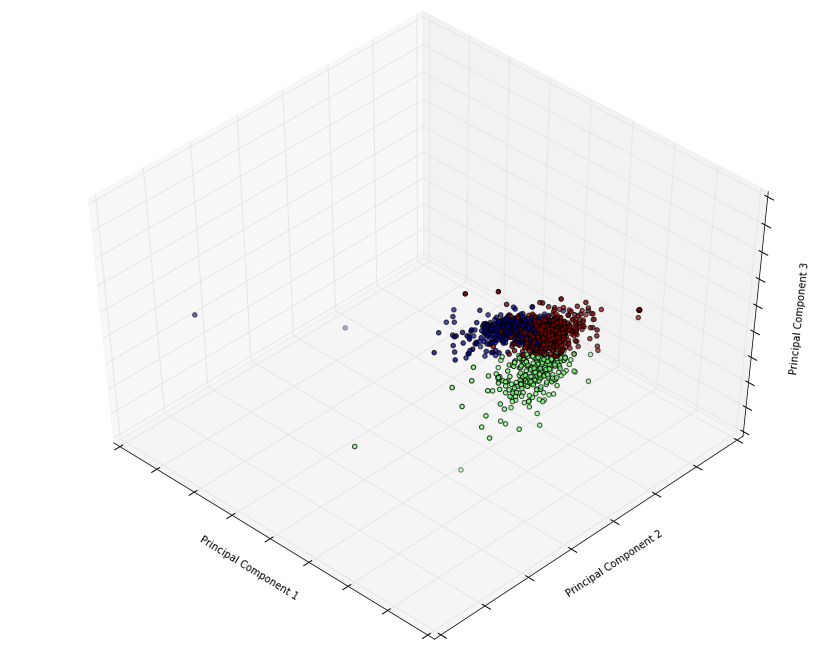

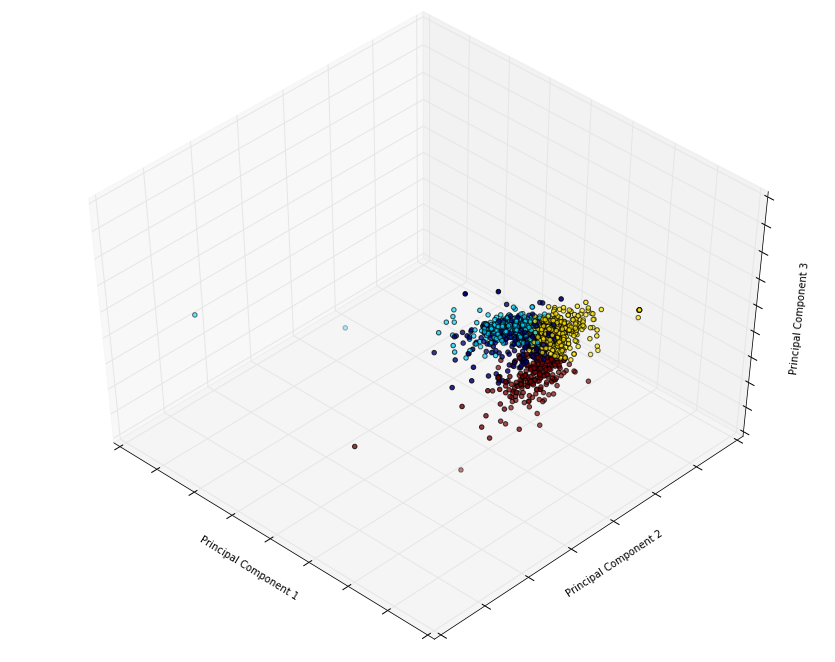

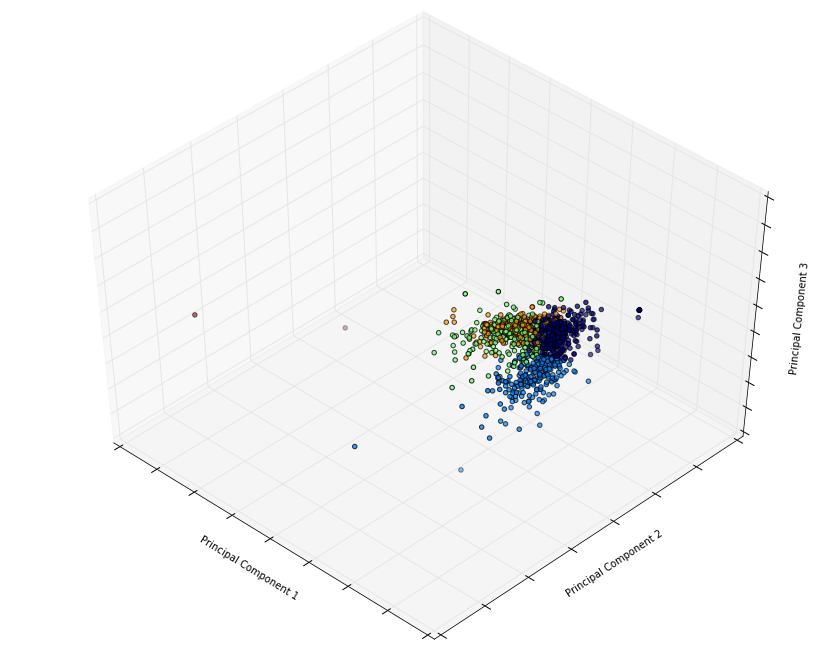

In [60]:
makeplot.make_plots(mat)

In [61]:
mat.sort_values(by=2, ascending=False).head()

,0,1,2
1084,0.344487,2.727921,6.013612
218,-0.072251,1.653016,5.446649
791,-1.340083,0.027895,4.347308
991,-0.199581,-0.247470,2.793942
761,0.839014,0.400457,2.452723


In [62]:
PA48.index[[1061, 147, 550, 1039, 1084]]

Index([u'Steven Hill', u'Bryon Russell', u'Jerrelle Benimon', u'Sim Bhullar',
       u'Thanasis Antetokounmpo'],
      dtype='object', name=u'Player Name')

#### Points 1061, 147, 550, 1039, 1084 are problematic

# Find outliers that are messing up PCA

### Drop them from PCA

In [63]:
PA48_nout = PA48.drop(PA48.index[[1061, 147, 550, 1039, 1084]])

In [64]:
mat_nout, comp_nout = pca_ready.run_pca(PA48_nout.iloc[:,:8])

In [65]:
km = KMeans(n_clusters=5, random_state = 30)

In [66]:
km.fit(mat_nout)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [67]:
dict_pca2_nout = pca_ready.make_cluster_dictionary2(km, PA48_nout.iloc[:,:8])

In [68]:
dict_pca2_nout

defaultdict(list,
            {0: ['Aaron Harrison',
              'Aaron McKie',
              'Alex Kirk',
              'Alex Scales',
              'Alonzo Gee',
              'Andre Dawkins',
              'Andre Emmett',
              'Andre Owens',
              'Andre Roberson',
              'Andreas Glyniadakis',
              'Anfernee Hardaway',
              'Anthony Brown',
              'Anthony Goldwire',
              'Anthony Parker',
              'Anthony Tolliver',
              'Antoine Wright',
              'Antonio Anderson',
              'Axel Toupane',
              'Bernard Robinson',
              'Billy Thomas',
              'Branden Dawson',
              'Brandon Rush',
              'Brent Barry',
              'Brian Cardinal',
              'Brian Scalabrine',
              'Bruce Bowen',
              'Bruno Caboclo',
              'Bryce Dejean-Jones',
              'Calbert Cheaney',
              'Casey Jacobsen',
              'Cedric Bozeman',

# Regraph

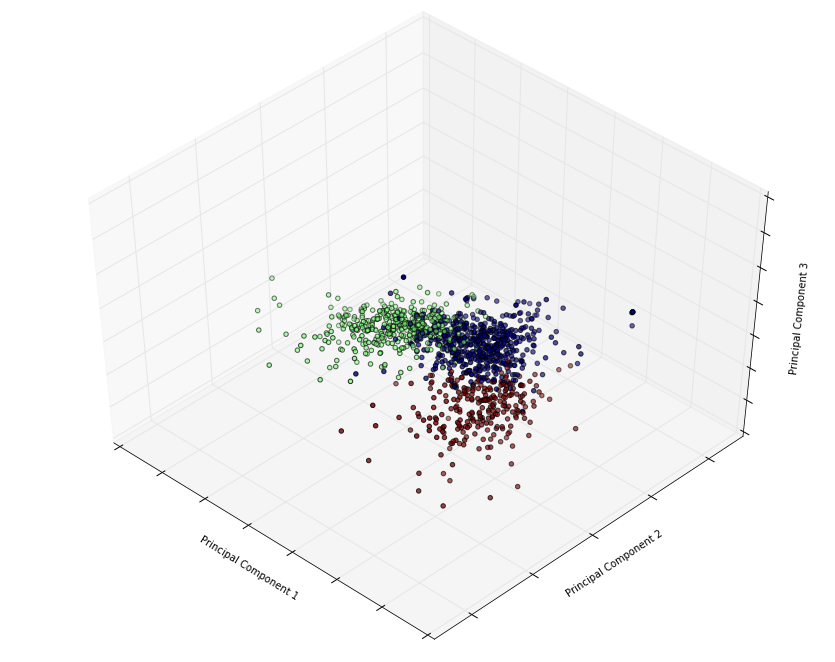

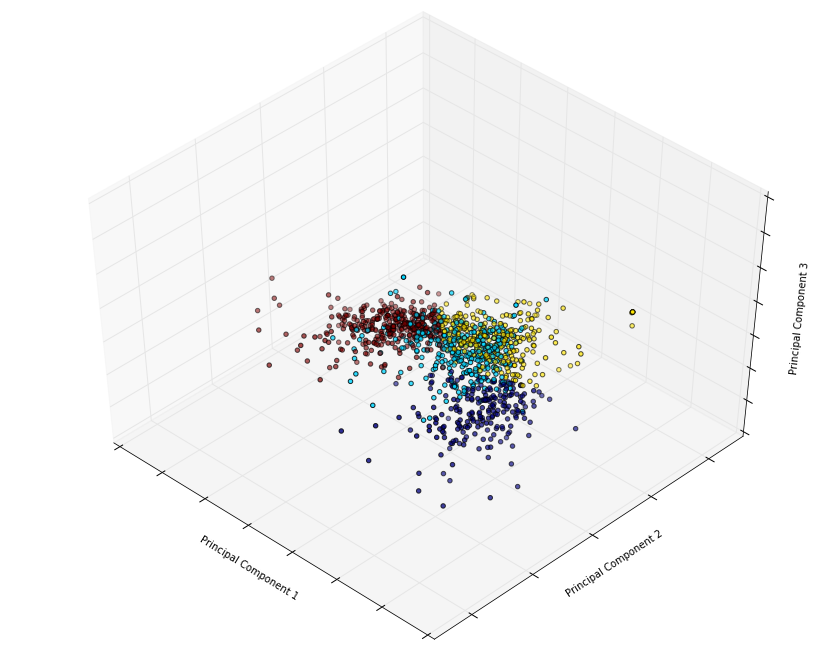

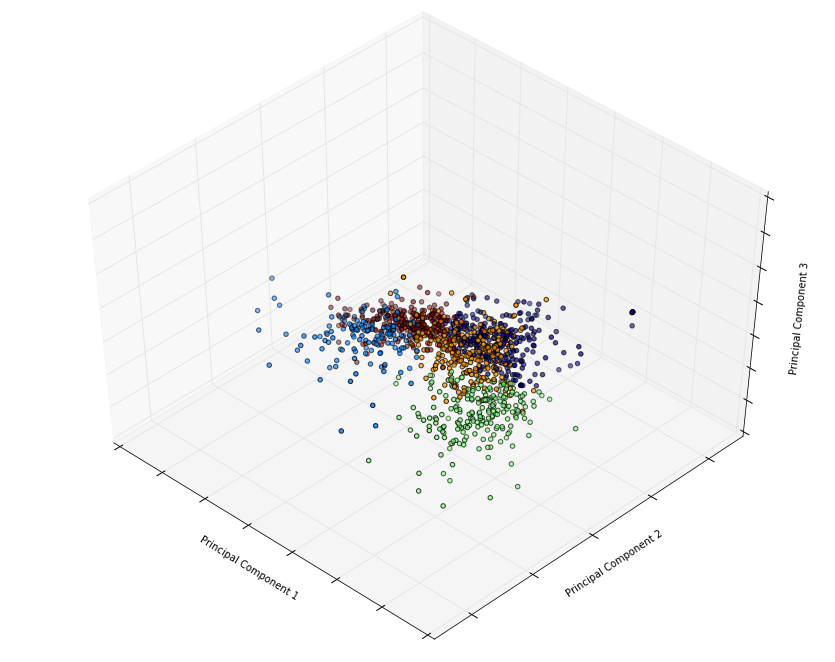

In [69]:
makeplot.make_plots(mat_nout, filename='rmoutlier')

# Silhouette Score Benchmark

In [70]:
from scripts import makesilplot

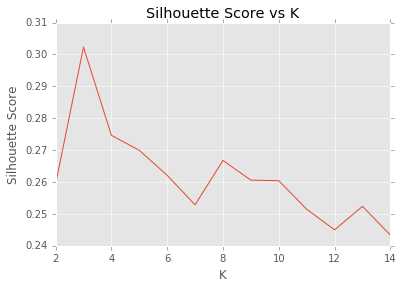

In [71]:
makesilplot.plot_silhouette(mat_nout, 15)

('For n_clusters =', 3, 'The average silhouette_score is :', 0.30231034565980669)


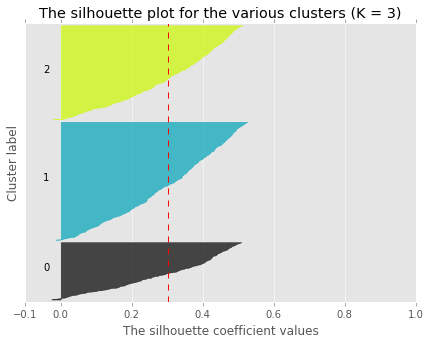

In [72]:
makesilplot.cluster_plot(mat_nout, 3)

('For n_clusters =', 4, 'The average silhouette_score is :', 0.27483420275869386)


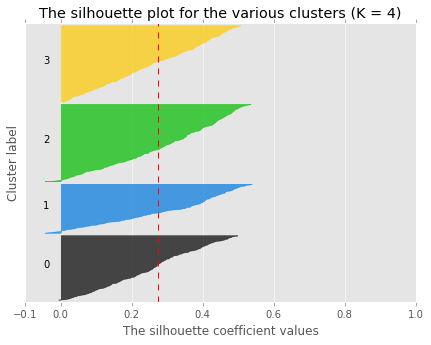

In [73]:
makesilplot.cluster_plot(mat_nout, 4)

##### data suggest not really clusterable

In [74]:
km = KMeans(n_clusters=3, random_state = 30)

In [75]:
km.fit(mat_nout)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

##### lets look at the actual clusters

In [76]:
dict_pca4_nout = pca_ready.make_cluster_dictionary2(km, PA48_nout)
dict_pca4_nout[2][:10]

['A.J. Price',
 'Aaron Brooks',
 'Aaron McKie',
 'Aaron Miles',
 'Acie Law',
 'Alexey Shved',
 'Allen Iverson',
 'Alvin Williams',
 'Andre Barrett',
 'Andre Iguodala']

#### despite silhouette scores indicating clusters not optimal, clusters seem to make sense. This cluster has a very high density of guards. Steph Curry, Chris Paul, Steve Nash, Russell Westbrook, Tony Parker, Jeremy Lin.

# Cluster Sense

### Let us evaluate these clusters by looking at the 10 highest expected scores per cluster

In [176]:
player_score_list1 = []
for player in dict_pca4_nout[0]:
    player_score_list1.append((player, PA.ix[player, 'Score']))
sorted(player_score_list1, key=lambda x: x[1], reverse=True)[:10]

[('Carmelo Anthony', 39.184366576819407),
 ('Rudy Gay', 30.688194444444445),
 ('Joe Johnson', 30.147542997542999),
 ('Michael Redd', 28.352050473186114),
 ('Luol Deng', 28.305026455026461),
 ('Jason Richardson', 27.75009174311927),
 ('Andrew Wiggins', 27.708860759493668),
 ('DeMar DeRozan', 27.313152804642165),
 ('Danny Granger', 27.222013651877131),
 ('Stephen Jackson', 27.045886654478981)]

In [175]:
player_score_list2 = []
for player in dict_pca4_nout[1]:
    player_score_list2.append((player, PA.ix[player, 'Score']))
sorted(player_score_list2, key=lambda x: x[1], reverse=True)[:10]

[('Kevin Durant', 42.527272727272738),
 ('Anthony Davis', 40.734999999999999),
 ('Blake Griffin', 39.788423645320194),
 ('Dwight Howard', 39.382597730138706),
 ('DeMarcus Cousins', 38.940435835351089),
 ('Yao Ming', 38.010330578512395),
 ('Pau Gasol', 37.760344827586202),
 ('Dirk Nowitzki', 36.558917589175891),
 ('Kevin Love', 36.185546875),
 ('Karl-Anthony Towns', 36.129870129870135)]

In [177]:
player_score_list3 = []
for player in dict_pca4_nout[2]:
    player_score_list3.append((player, PA.ix[player, 'Score']))
sorted(player_score_list3, key=lambda x: x[1], reverse=True)[:10]

[('LeBron James', 48.526424242424234),
 ('Kobe Bryant', 41.543618513323985),
 ('Chris Paul', 41.384135240572164),
 ('Dwyane Wade', 40.725035161744024),
 ('Russell Westbrook', 39.864212328767117),
 ('Allen Iverson', 39.085526315789465),
 ('Stephen Curry', 38.581632653061227),
 ('John Wall', 37.757582938388616),
 ('Damian Lillard', 34.936277602523667),
 ('James Harden', 34.615500945179576)]

# Start aggregating players

In [92]:
clusteroneX, clusteroney = random_forest.date_with_forest(df, remove_date=False)

In [93]:
dict_pca4_nout

defaultdict(list,
            {0: ['Aaron Harrison',
              'Adam Morrison',
              'Adonis Thomas',
              'Al Harrington',
              'Al Thornton',
              'Alan Anderson',
              'Alando Tucker',
              'Alec Burks',
              'Alex Acker',
              'Alex Kirk',
              'Alex Scales',
              'Allan Ray',
              'Allen Crabbe',
              'Alonzo Gee',
              'Andre Dawkins',
              'Andre Emmett',
              'Andre Owens',
              'Andre Roberson',
              'Andrea Bargnani',
              'Andreas Glyniadakis',
              'Andres Nocioni',
              'Andrew Goudelock',
              'Andrew Nicholson',
              'Andrew Wiggins',
              'Andy Rautins',
              'Anthony Brown',
              'Anthony Goldwire',
              'Anthony Grundy',
              'Anthony Morrow',
              'Anthony Parker',
              'Anthony Roberson',
              'An

In [94]:
one_x = clusteroneX[clusteroneX['Player Name'].isin(dict_pca4_nout[2])]
one_y = clusteroney[clusteroney['Player Name'].isin(dict_pca4_nout[2])]

In [95]:
curryleftx = one_x[one_x['Player Name'] != 'Stephen Curry']
currylefty = one_y[one_y['Player Name'] != 'Stephen Curry']

In [96]:
onlycurryx = one_x[one_x['Player Name'] == 'Stephen Curry']
onlycurryy = one_y[one_y['Player Name'] == 'Stephen Curry']

In [97]:
today = datetime.date.today()
stop_average_date = today - datetime.timedelta(140)

In [98]:
aftercurryx = onlycurryx[onlycurryx['Date'] > stop_average_date]
aftercurryy = onlycurryy[onlycurryy['Date'] > stop_average_date]

In [99]:
beforecurryx = onlycurryx[onlycurryx['Date'] <= stop_average_date]
beforecurryy = onlycurryy[onlycurryy['Date'] <= stop_average_date]

In [100]:
from sklearn.cross_validation import train_test_split

In [101]:
aftercurryx_train, aftercurryx_test, aftercurryy_train, aftercurryy_test = train_test_split(aftercurryx[list(aftercurryx.columns-['Player Name','Date'])], aftercurryy.iloc[:,3], test_size = 0.25, random_state = 30)

/Users/ericpei/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [102]:
ClusterOne_xtrain = pd.concat([curryleftx, beforecurryx])
ClusterOne_ytrain = pd.concat([currylefty['FG'], beforecurryy['FG']])
ClusterOne_StephAvg = pd.concat([beforecurryy['FG'], aftercurryy_train]).mean()
#ClusterOne_ytrain = ClusterOne_ytrain.append(aftercurryy_train)

In [103]:
ClusterOne_xtrain = ClusterOne_xtrain.drop('Date', axis=1)

In [104]:
ClusterOne_rf = RandomForestRegressor()

In [105]:
ClusterOne_rf.fit(ClusterOne_xtrain.ix[:, ClusterOne_xtrain.columns != 'Player Name'], ClusterOne_ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [106]:
clustcurrypredictions = ClusterOne_rf.predict(aftercurryx_test)

In [107]:
mean_squared_error(clustcurrypredictions, aftercurryy_test)

14.105625

In [108]:
#PA.loc['Stephen Curry', 'FG']

In [109]:
stephavg = np.empty(len(clustcurrypredictions))

In [110]:
ClusterOne_StephAvg

7.8562500000000002

In [111]:
stephavg.fill(ClusterOne_StephAvg)

In [112]:
mean_squared_error(stephavg, aftercurryy_test)

14.246445312499999

In [113]:
clustcurrypredictions

array([  9. ,  11.5,  12.9,   7. ,   9.3,  10.4,   9.4,   9.2,  10.1,
         9.4,   9.8,   8.4,  10. ,   9.1,   9.4,   8.2])

In [114]:
aftercurryy_test

243413     7
243437    14
243427     4
243434    12
243453     7
243424     8
243456     9
243446    10
243425    11
243443     4
243462    15
243435     5
243422    13
243433     9
243442    14
243407     9
Name: FG, dtype: int64

# Cluster Two

In [115]:
from scripts import RandomForest

In [116]:
from scripts import clusters

In [117]:
PA140 = make_df.make_averages(df, cutoff=140)

In [118]:
cluster2predictions, true_2_y = clusters.get_predictions(df, cluster_dict=dict_pca4_nout, cluster_num=2, cutoff=140)

In [119]:
true_2y_score = 2*true_2_y['FG'] + true_2_y['3P'] + true_2_y['FT'] + 1.2*true_2_y['TRB'] + 1.5*true_2_y['AST']\
                + 2*true_2_y['BLK'] + 2*true_2_y['STL'] - true_2_y['TOV']

In [120]:
mean_squared_error(true_2y_score, cluster2predictions['SCR'])

98.624783228643224

(-10, 75)

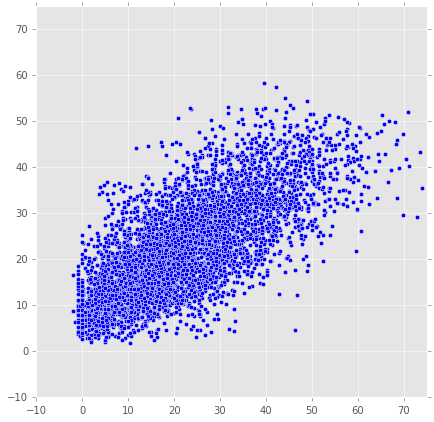

In [121]:
plt.figure(figsize=(7,7))
plt.scatter(true_2y_score, cluster2predictions['SCR'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [122]:
from scipy import stats

In [123]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_2y_score, cluster2predictions['SCR'])
print "r-squared:", r_value**2

r-squared: 0.51480117135


In [124]:
true_2_y['SCRavg'] = true_2_y['Player Name'].apply(lambda x: PA140.ix[x, 'Score'] if x in PA140.index else 0)

In [125]:
mean_squared_error(true_2y_score, true_2_y['SCRavg'])

145.85434988308182

(-10, 75)

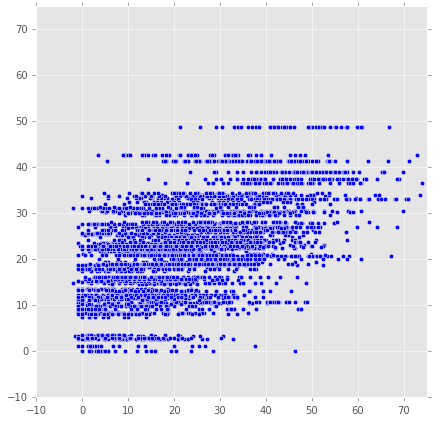

In [126]:
plt.figure(figsize=(7,7))
plt.scatter(true_2y_score, true_2_y['SCRavg'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [127]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_2y_score, true_2_y['SCRavg'])

In [128]:
print "r-squared:", r_value**2

r-squared: 0.299216253653


# Cluster One

In [129]:
from scripts import clusters

In [130]:
cluster1predictions, true_y = clusters.get_predictions(df, cluster_dict=dict_pca4_nout, cluster_num=1, cutoff=140)

In [131]:
true_y_score = 2*true_y['FG'] + true_y['3P'] + true_y['FT'] + 1.2*true_y['TRB'] + 1.5*true_y['AST']\
                + 2*true_y['BLK'] + 2*true_y['STL'] - true_y['TOV']

In [132]:
mean_squared_error(true_y_score, cluster1predictions['SCR'])

95.658811120252295

(-10, 75)

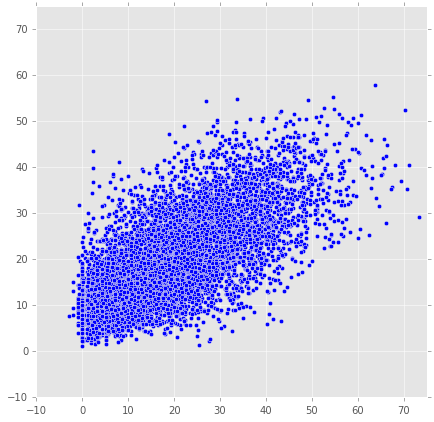

In [133]:
plt.figure(figsize=(7,7))
plt.scatter(true_y_score, cluster1predictions['SCR'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [134]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_y_score, cluster1predictions['SCR'])
print "r-squared:", r_value**2

r-squared: 0.462779888416


In [135]:
true_y['SCRavg'] = true_y['Player Name'].apply(lambda x: PA140.ix[x, 'Score'] if x in PA140.index else 0)

In [136]:
mean_squared_error(true_y_score, true_y['SCRavg'])

127.49800464693936

(-10, 75)

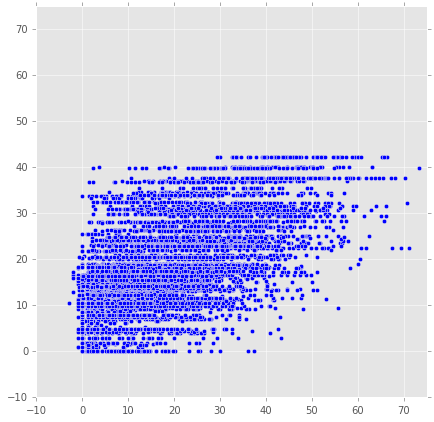

In [137]:
plt.figure(figsize=(7,7))
plt.scatter(true_y_score, true_y['SCRavg'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [138]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_y_score, true_y['SCRavg'])
print "r-squared:", r_value**2

r-squared: 0.303794901692


# Cluster Zero

In [139]:
cluster0predictions, true_0_y = clusters.get_predictions(df, cluster_dict=dict_pca4_nout, cluster_num=0, cutoff=140)

In [140]:
true_0y_score = 2*true_0_y['FG'] + true_0_y['3P'] + true_0_y['FT'] + 1.2*true_0_y['TRB'] + 1.5*true_0_y['AST']\
                + 2*true_0_y['BLK'] + 2*true_0_y['STL'] - true_0_y['TOV']

In [141]:
mean_squared_error(true_0y_score, cluster0predictions['SCR'])

76.273541165972631

(-10, 75)

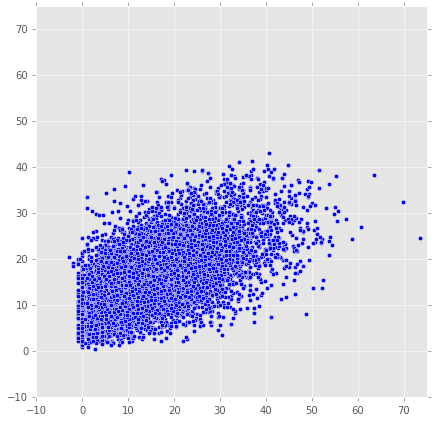

In [142]:
plt.figure(figsize=(7,7))
plt.scatter(true_0y_score, cluster0predictions['SCR'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [143]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_0y_score, cluster0predictions['SCR'])
print "r-squared:", r_value**2

r-squared: 0.373386344848


In [144]:
true_0_y['SCRavg'] = true_0_y['Player Name'].apply(lambda x: PA140.ix[x, 'Score'] if x in PA140.index else 0)

In [145]:
mean_squared_error(true_0y_score, true_0_y['SCRavg'])

108.07587916983587

(-10, 75)

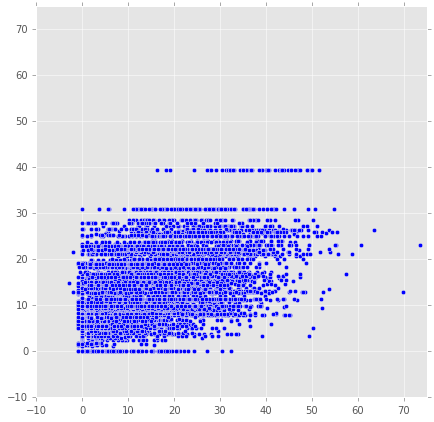

In [146]:
plt.figure(figsize=(7,7))
plt.scatter(true_0y_score, true_0_y['SCRavg'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [147]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_0y_score, true_0_y['SCRavg'])
print "r-squared:", r_value**2

r-squared: 0.163235469458


# Total R^2

In [148]:
mean_squared_error(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([cluster0predictions['SCR'], cluster1predictions['SCR'], cluster2predictions['SCR']]))

88.392633960144565

(-10, 75)

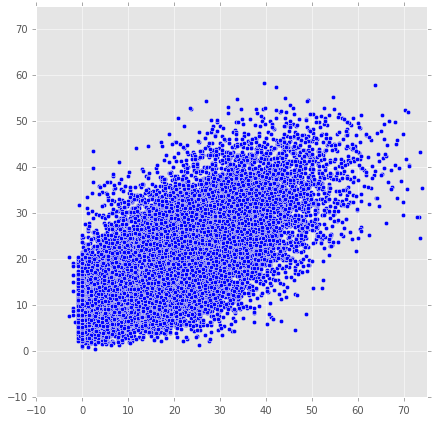

In [149]:
plt.figure(figsize=(7,7))
plt.scatter(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([cluster0predictions['SCR'], cluster1predictions['SCR'], cluster2predictions['SCR']]))
plt.xlim(-10,75)
plt.ylim(-10,75)

In [150]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([cluster0predictions['SCR'], cluster1predictions['SCR'], cluster2predictions['SCR']]))
print "r-squared:", r_value**2

r-squared: 0.474273919399


In [151]:
mean_squared_error(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([true_0_y['SCRavg'], true_y['SCRavg'], true_2_y['SCRavg']]))

123.80683243890779

(-10, 75)

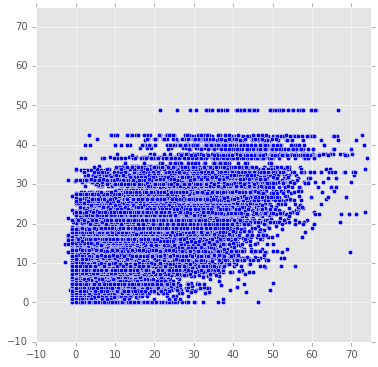

In [152]:
plt.figure(figsize=(6,6))
plt.scatter(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([true_0_y['SCRavg'], true_y['SCRavg'], true_2_y['SCRavg']]))
plt.xlim(-10,75)
plt.ylim(-10,75)

In [153]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([true_0_y['SCRavg'], true_y['SCRavg'], true_2_y['SCRavg']]))
print "r-squared:", r_value**2

r-squared: 0.288933855399


# Individual Model

In [154]:
#sc, scx, scy = random_forest.individual_forest_df(forest_df, y_df, 'Stephen Curry')

In [155]:
# from sklearn.cross_validation import train_test_split
# from sklearn.metrics import mean_squared_error

In [156]:
# fy, ydf = random_forest.date_with_forest(df,cutoff=120)

In [157]:
# curry_X = fy[fy['Player Name'] == 'Stephen Curry']
# curry_y = ydf[ydf['Player Name'] == 'Stephen Curry']

In [158]:
# scurryX_train, scurryX_test, scurryy_train, scurryy_test = train_test_split(curry_X[curry_X.columns-['Player Name']], curry_y.iloc[:,1], test_size = 0.25, random_state = 30)

In [159]:
# dictio = {}

In [160]:
# dictio['XYZ'] = RandomForestRegressor()

In [161]:
# dictio['XYZ'].fit(X_test,y_test)

In [162]:
# scurryX_test